Inspired from https://medium.com/@vaibhaw.vipul/building-autoencoder-in-pytorch-34052d1d280c and https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

## Imports

In [1]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import MultiStepLR

In [2]:
import sys
sys.path.append('../')

from utils.ImageDisplay import show_some, imshow
from utils.ModelSummary import summarize
from utils.TrainedModels import save_trained, load_trained
from models.BiggerConvAutoencoderModel import Autoencoder

torch.Size([1024, 1024, 3])
torch.Size([3, 1024, 1024])


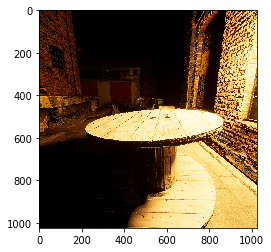

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
filePath1 = "../../../VIDIT/train/scene_abandonned_city_54/2500/E/image1015.png"
img1 = mpimg.imread(filePath1)[:,:,0:3]
implot1 = plt.imshow(img1)
img1=torch.from_numpy(img1)
print(img1.shape)
img1 = img1.permute(2,0,1)
print(img1.shape)

torch.Size([1024, 1024, 3])
torch.Size([3, 1024, 1024])


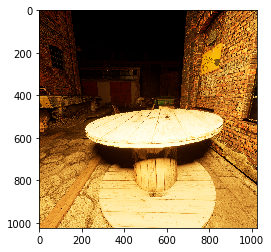

In [4]:
filePath2 = "../../../VIDIT/train/scene_abandonned_city_54/2500/S/image1025.png"
img2 = mpimg.imread(filePath2)[:,:,0:3]
implot2 = plt.imshow(img2)
img2=torch.from_numpy(img2)
print(img2.shape)
img2 = img2.permute(2,0,1)
print(img2.shape)

## Loading and Transforming data

In [5]:
class OneImageDataset(Dataset):
    def __init__(self):
        self.samples=[(Variable(img1).cuda(),Variable(img2).cuda())]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]
    
trainloader = OneImageDataset()
testloader = OneImageDataset()

## About the model

In [6]:
model = Autoencoder().cuda()
distance = nn.MSELoss().cuda() #We can modify this, eg input and output must have same edges, we should experiment differents ones
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5) #Weight Decay is L2 Regularization
scheduler = MultiStepLR(optimizer, milestones=[3000,8000,13000,18000], gamma=0.1) #divide learning rate by 10 at each milestone

In [7]:
summarize(model, input_size=img1.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 6, 1020, 1020]             456
              ReLU-2        [-1, 6, 1020, 1020]               0
            Conv2d-3       [-1, 16, 1016, 1016]           2,416
              ReLU-4       [-1, 16, 1016, 1016]               0
            Conv2d-5       [-1, 32, 1012, 1012]          12,832
              ReLU-6       [-1, 32, 1012, 1012]               0
            Conv2d-7       [-1, 64, 1008, 1008]          51,264
              ReLU-8       [-1, 64, 1008, 1008]               0
   ConvTranspose2d-9       [-1, 32, 1012, 1012]          51,232
             ReLU-10       [-1, 32, 1012, 1012]               0
  ConvTranspose2d-11       [-1, 16, 1016, 1016]          12,816
             ReLU-12       [-1, 16, 1016, 1016]               0
  ConvTranspose2d-13        [-1, 6, 1020, 1020]           2,406
             ReLU-14        [-1, 6, 102

## Training

In [8]:
#defining some params
num_epochs = 20000 #you can go for more epochs

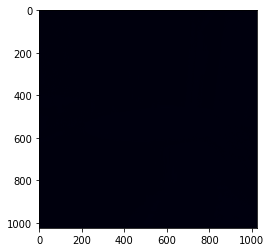

epoch [1/20000], loss:0.2823
epoch [11/20000], loss:0.0918
epoch [21/20000], loss:0.0889
epoch [31/20000], loss:0.0827
epoch [41/20000], loss:0.0813
epoch [51/20000], loss:0.0792
epoch [61/20000], loss:0.0773
epoch [71/20000], loss:0.0754
epoch [81/20000], loss:0.0737
epoch [91/20000], loss:0.0719
epoch [101/20000], loss:0.0724
epoch [111/20000], loss:0.0700
epoch [121/20000], loss:0.0690
epoch [131/20000], loss:0.0702
epoch [141/20000], loss:0.0707
epoch [151/20000], loss:0.0688
epoch [161/20000], loss:0.0719
epoch [171/20000], loss:0.0711
epoch [181/20000], loss:0.0682
epoch [191/20000], loss:0.0667
epoch [201/20000], loss:0.0659
epoch [211/20000], loss:0.0724
epoch [221/20000], loss:0.0659
epoch [231/20000], loss:0.0658
epoch [241/20000], loss:0.0648
epoch [251/20000], loss:0.0641
epoch [261/20000], loss:0.0655
epoch [271/20000], loss:0.0662
epoch [281/20000], loss:0.0636
epoch [291/20000], loss:0.0628
epoch [301/20000], loss:0.0625
epoch [311/20000], loss:0.0691
epoch [321/20000], 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


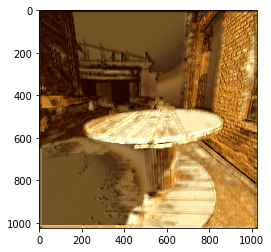

epoch [1001/20000], loss:0.0555
epoch [1011/20000], loss:0.0614
epoch [1021/20000], loss:0.0581
epoch [1031/20000], loss:0.0568
epoch [1041/20000], loss:0.0560
epoch [1051/20000], loss:0.0555
epoch [1061/20000], loss:0.0549
epoch [1071/20000], loss:0.0550
epoch [1081/20000], loss:0.0603
epoch [1091/20000], loss:0.0570
epoch [1101/20000], loss:0.0556
epoch [1111/20000], loss:0.0545
epoch [1121/20000], loss:0.0541
epoch [1131/20000], loss:0.0535
epoch [1141/20000], loss:0.0541
epoch [1151/20000], loss:0.0546
epoch [1161/20000], loss:0.0551
epoch [1171/20000], loss:0.0600
epoch [1181/20000], loss:0.0549
epoch [1191/20000], loss:0.0532
epoch [1201/20000], loss:0.0523
epoch [1211/20000], loss:0.0521
epoch [1221/20000], loss:0.0541
epoch [1231/20000], loss:0.0559
epoch [1241/20000], loss:0.0547
epoch [1251/20000], loss:0.0517
epoch [1261/20000], loss:0.0650
epoch [1271/20000], loss:0.0579
epoch [1281/20000], loss:0.0555
epoch [1291/20000], loss:0.0530
epoch [1301/20000], loss:0.0518
epoch [1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


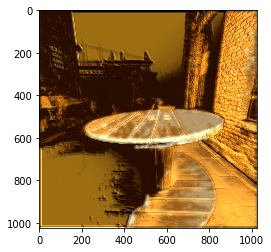

epoch [2001/20000], loss:0.0889
epoch [2011/20000], loss:0.0734
epoch [2021/20000], loss:0.0679
epoch [2031/20000], loss:0.0636
epoch [2041/20000], loss:0.0613
epoch [2051/20000], loss:0.0595
epoch [2061/20000], loss:0.0668
epoch [2071/20000], loss:0.0619
epoch [2081/20000], loss:0.0607
epoch [2091/20000], loss:0.0587
epoch [2101/20000], loss:0.0584
epoch [2111/20000], loss:0.0566
epoch [2121/20000], loss:0.0558
epoch [2131/20000], loss:0.0569
epoch [2141/20000], loss:0.0566
epoch [2151/20000], loss:0.0563
epoch [2161/20000], loss:0.0541
epoch [2171/20000], loss:0.0533
epoch [2181/20000], loss:0.0602
epoch [2191/20000], loss:0.0536
epoch [2201/20000], loss:0.0519
epoch [2211/20000], loss:0.0624
epoch [2221/20000], loss:0.0591
epoch [2231/20000], loss:0.0559
epoch [2241/20000], loss:0.0539
epoch [2251/20000], loss:0.0525
epoch [2261/20000], loss:0.0514
epoch [2271/20000], loss:0.0555
epoch [2281/20000], loss:0.0505
epoch [2291/20000], loss:0.0502
epoch [2301/20000], loss:0.0522
epoch [2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


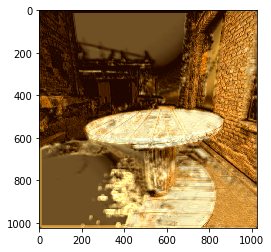

epoch [3001/20000], loss:0.0380
epoch [3011/20000], loss:0.0370
epoch [3021/20000], loss:0.0366
epoch [3031/20000], loss:0.0363
epoch [3041/20000], loss:0.0361
epoch [3051/20000], loss:0.0359
epoch [3061/20000], loss:0.0357
epoch [3071/20000], loss:0.0355
epoch [3081/20000], loss:0.0353
epoch [3091/20000], loss:0.0352
epoch [3101/20000], loss:0.0351
epoch [3111/20000], loss:0.0351
epoch [3121/20000], loss:0.0350
epoch [3131/20000], loss:0.0350
epoch [3141/20000], loss:0.0349
epoch [3151/20000], loss:0.0348
epoch [3161/20000], loss:0.0349
epoch [3171/20000], loss:0.0348
epoch [3181/20000], loss:0.0347
epoch [3191/20000], loss:0.0347
epoch [3201/20000], loss:0.0345
epoch [3211/20000], loss:0.0346
epoch [3221/20000], loss:0.0345
epoch [3231/20000], loss:0.0344
epoch [3241/20000], loss:0.0343
epoch [3251/20000], loss:0.0343
epoch [3261/20000], loss:0.0343
epoch [3271/20000], loss:0.0346
epoch [3281/20000], loss:0.0342
epoch [3291/20000], loss:0.0372
epoch [3301/20000], loss:0.0356
epoch [3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


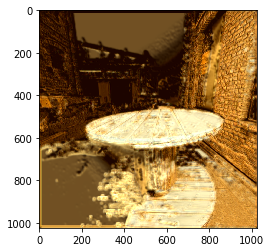

epoch [4001/20000], loss:0.0317
epoch [4011/20000], loss:0.0315
epoch [4021/20000], loss:0.0313
epoch [4031/20000], loss:0.0312
epoch [4041/20000], loss:0.0311
epoch [4051/20000], loss:0.0310
epoch [4061/20000], loss:0.0337
epoch [4071/20000], loss:0.0327
epoch [4081/20000], loss:0.0318
epoch [4091/20000], loss:0.0320
epoch [4101/20000], loss:0.0315
epoch [4111/20000], loss:0.0315
epoch [4121/20000], loss:0.0313
epoch [4131/20000], loss:0.0311
epoch [4141/20000], loss:0.0310
epoch [4151/20000], loss:0.0309
epoch [4161/20000], loss:0.0308
epoch [4171/20000], loss:0.0306
epoch [4181/20000], loss:0.0315
epoch [4191/20000], loss:0.0315
epoch [4201/20000], loss:0.0313
epoch [4211/20000], loss:0.0308
epoch [4221/20000], loss:0.0306
epoch [4231/20000], loss:0.0305
epoch [4241/20000], loss:0.0304
epoch [4251/20000], loss:0.0303
epoch [4261/20000], loss:0.0302
epoch [4271/20000], loss:0.0300
epoch [4281/20000], loss:0.0374
epoch [4291/20000], loss:0.0345
epoch [4301/20000], loss:0.0333
epoch [4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


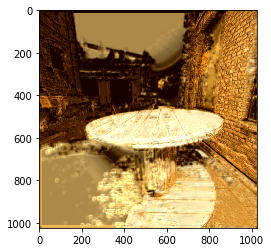

epoch [5001/20000], loss:0.0398
epoch [5011/20000], loss:0.0320
epoch [5021/20000], loss:0.0311
epoch [5031/20000], loss:0.0305
epoch [5041/20000], loss:0.0300
epoch [5051/20000], loss:0.0297
epoch [5061/20000], loss:0.0294
epoch [5071/20000], loss:0.0292
epoch [5081/20000], loss:0.0291
epoch [5091/20000], loss:0.0290
epoch [5101/20000], loss:0.0289
epoch [5111/20000], loss:0.0289
epoch [5121/20000], loss:0.0289
epoch [5131/20000], loss:0.0287
epoch [5141/20000], loss:0.0287
epoch [5151/20000], loss:0.0286
epoch [5161/20000], loss:0.0286
epoch [5171/20000], loss:0.0287
epoch [5181/20000], loss:0.0284
epoch [5191/20000], loss:0.0285
epoch [5201/20000], loss:0.0285
epoch [5211/20000], loss:0.0286
epoch [5221/20000], loss:0.0289
epoch [5231/20000], loss:0.0284
epoch [5241/20000], loss:0.0390
epoch [5251/20000], loss:0.0320
epoch [5261/20000], loss:0.0304
epoch [5271/20000], loss:0.0299
epoch [5281/20000], loss:0.0295
epoch [5291/20000], loss:0.0292
epoch [5301/20000], loss:0.0290
epoch [5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


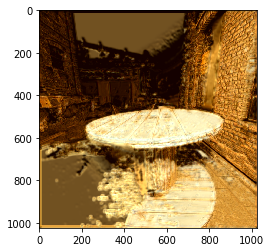

epoch [6001/20000], loss:0.0277
epoch [6011/20000], loss:0.0276
epoch [6021/20000], loss:0.0274
epoch [6031/20000], loss:0.0272
epoch [6041/20000], loss:0.0271
epoch [6051/20000], loss:0.0277
epoch [6061/20000], loss:0.0275
epoch [6071/20000], loss:0.0272
epoch [6081/20000], loss:0.0270
epoch [6091/20000], loss:0.0268
epoch [6101/20000], loss:0.0267
epoch [6111/20000], loss:0.0269
epoch [6121/20000], loss:0.0267
epoch [6131/20000], loss:0.0268
epoch [6141/20000], loss:0.0269
epoch [6151/20000], loss:0.0269
epoch [6161/20000], loss:0.0264
epoch [6171/20000], loss:0.0267
epoch [6181/20000], loss:0.0284
epoch [6191/20000], loss:0.0279
epoch [6201/20000], loss:0.0270
epoch [6211/20000], loss:0.0267
epoch [6221/20000], loss:0.0268
epoch [6231/20000], loss:0.0266
epoch [6241/20000], loss:0.0264
epoch [6251/20000], loss:0.0274
epoch [6261/20000], loss:0.0268
epoch [6271/20000], loss:0.0336
epoch [6281/20000], loss:0.0312
epoch [6291/20000], loss:0.0299
epoch [6301/20000], loss:0.0292
epoch [6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


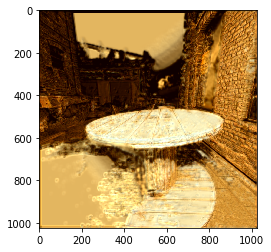

epoch [7001/20000], loss:0.0571
epoch [7011/20000], loss:0.0320
epoch [7021/20000], loss:0.0292
epoch [7031/20000], loss:0.0284
epoch [7041/20000], loss:0.0278
epoch [7051/20000], loss:0.0275
epoch [7061/20000], loss:0.0273
epoch [7071/20000], loss:0.0272
epoch [7081/20000], loss:0.0271
epoch [7091/20000], loss:0.0270
epoch [7101/20000], loss:0.0269
epoch [7111/20000], loss:0.0269
epoch [7121/20000], loss:0.0268
epoch [7131/20000], loss:0.0267
epoch [7141/20000], loss:0.0267
epoch [7151/20000], loss:0.0266
epoch [7161/20000], loss:0.0266
epoch [7171/20000], loss:0.0265
epoch [7181/20000], loss:0.0265
epoch [7191/20000], loss:0.0264
epoch [7201/20000], loss:0.0264
epoch [7211/20000], loss:0.0264
epoch [7221/20000], loss:0.0263
epoch [7231/20000], loss:0.0263
epoch [7241/20000], loss:0.0263
epoch [7251/20000], loss:0.0262
epoch [7261/20000], loss:0.0261
epoch [7271/20000], loss:0.0261
epoch [7281/20000], loss:0.0261
epoch [7291/20000], loss:0.0259
epoch [7301/20000], loss:0.0272
epoch [7

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


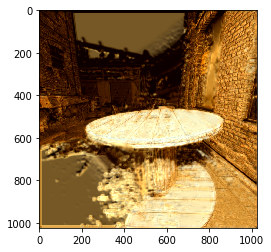

epoch [8001/20000], loss:0.0272
epoch [8011/20000], loss:0.0271
epoch [8021/20000], loss:0.0270
epoch [8031/20000], loss:0.0269
epoch [8041/20000], loss:0.0268
epoch [8051/20000], loss:0.0268
epoch [8061/20000], loss:0.0267
epoch [8071/20000], loss:0.0267
epoch [8081/20000], loss:0.0267
epoch [8091/20000], loss:0.0266
epoch [8101/20000], loss:0.0266
epoch [8111/20000], loss:0.0265
epoch [8121/20000], loss:0.0265
epoch [8131/20000], loss:0.0264
epoch [8141/20000], loss:0.0264
epoch [8151/20000], loss:0.0263
epoch [8161/20000], loss:0.0263
epoch [8171/20000], loss:0.0262
epoch [8181/20000], loss:0.0261
epoch [8191/20000], loss:0.0261
epoch [8201/20000], loss:0.0260
epoch [8211/20000], loss:0.0260
epoch [8221/20000], loss:0.0260
epoch [8231/20000], loss:0.0260
epoch [8241/20000], loss:0.0259
epoch [8251/20000], loss:0.0259
epoch [8261/20000], loss:0.0259
epoch [8271/20000], loss:0.0259
epoch [8281/20000], loss:0.0258
epoch [8291/20000], loss:0.0258
epoch [8301/20000], loss:0.0258
epoch [8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


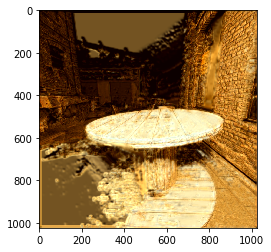

epoch [9001/20000], loss:0.0246
epoch [9011/20000], loss:0.0245
epoch [9021/20000], loss:0.0245
epoch [9031/20000], loss:0.0245
epoch [9041/20000], loss:0.0245
epoch [9051/20000], loss:0.0245
epoch [9061/20000], loss:0.0245
epoch [9071/20000], loss:0.0244
epoch [9081/20000], loss:0.0245
epoch [9091/20000], loss:0.0244
epoch [9101/20000], loss:0.0244
epoch [9111/20000], loss:0.0244
epoch [9121/20000], loss:0.0244
epoch [9131/20000], loss:0.0244
epoch [9141/20000], loss:0.0244
epoch [9151/20000], loss:0.0244
epoch [9161/20000], loss:0.0244
epoch [9171/20000], loss:0.0243
epoch [9181/20000], loss:0.0243
epoch [9191/20000], loss:0.0243
epoch [9201/20000], loss:0.0243
epoch [9211/20000], loss:0.0243
epoch [9221/20000], loss:0.0243
epoch [9231/20000], loss:0.0243
epoch [9241/20000], loss:0.0243
epoch [9251/20000], loss:0.0243
epoch [9261/20000], loss:0.0243
epoch [9271/20000], loss:0.0243
epoch [9281/20000], loss:0.0242
epoch [9291/20000], loss:0.0242
epoch [9301/20000], loss:0.0242
epoch [9

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


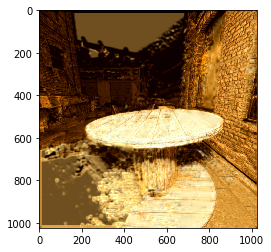

epoch [10001/20000], loss:0.0236
epoch [10011/20000], loss:0.0235
epoch [10021/20000], loss:0.0235
epoch [10031/20000], loss:0.0235
epoch [10041/20000], loss:0.0235
epoch [10051/20000], loss:0.0234
epoch [10061/20000], loss:0.0234
epoch [10071/20000], loss:0.0234
epoch [10081/20000], loss:0.0233
epoch [10091/20000], loss:0.0233
epoch [10101/20000], loss:0.0233
epoch [10111/20000], loss:0.0232
epoch [10121/20000], loss:0.0229
epoch [10131/20000], loss:0.0243
epoch [10141/20000], loss:0.0239
epoch [10151/20000], loss:0.0236
epoch [10161/20000], loss:0.0236
epoch [10171/20000], loss:0.0233
epoch [10181/20000], loss:0.0249
epoch [10191/20000], loss:0.0236
epoch [10201/20000], loss:0.0236
epoch [10211/20000], loss:0.0233
epoch [10221/20000], loss:0.0231
epoch [10231/20000], loss:0.0228
epoch [10241/20000], loss:0.0228
epoch [10251/20000], loss:0.0226
epoch [10261/20000], loss:0.0225
epoch [10271/20000], loss:0.0225
epoch [10281/20000], loss:0.0225
epoch [10291/20000], loss:0.0224
epoch [103

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


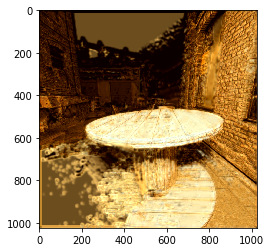

epoch [11001/20000], loss:0.0222
epoch [11011/20000], loss:0.0221
epoch [11021/20000], loss:0.0222
epoch [11031/20000], loss:0.0221
epoch [11041/20000], loss:0.0221
epoch [11051/20000], loss:0.0223
epoch [11061/20000], loss:0.0225
epoch [11071/20000], loss:0.0222
epoch [11081/20000], loss:0.0221
epoch [11091/20000], loss:0.0221
epoch [11101/20000], loss:0.0225
epoch [11111/20000], loss:0.0221
epoch [11121/20000], loss:0.0221
epoch [11131/20000], loss:0.0224
epoch [11141/20000], loss:0.0225
epoch [11151/20000], loss:0.0222
epoch [11161/20000], loss:0.0220
epoch [11171/20000], loss:0.0221
epoch [11181/20000], loss:0.0222
epoch [11191/20000], loss:0.0234
epoch [11201/20000], loss:0.0237
epoch [11211/20000], loss:0.0233
epoch [11221/20000], loss:0.0232
epoch [11231/20000], loss:0.0230
epoch [11241/20000], loss:0.0227
epoch [11251/20000], loss:0.0224
epoch [11261/20000], loss:0.0222
epoch [11271/20000], loss:0.0221
epoch [11281/20000], loss:0.0220
epoch [11291/20000], loss:0.0220
epoch [113

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


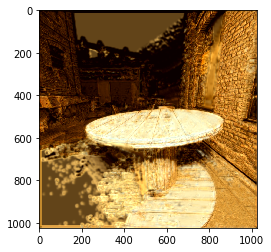

epoch [12001/20000], loss:0.0217
epoch [12011/20000], loss:0.0217
epoch [12021/20000], loss:0.0218
epoch [12031/20000], loss:0.0217
epoch [12041/20000], loss:0.0217
epoch [12051/20000], loss:0.0217
epoch [12061/20000], loss:0.0218
epoch [12071/20000], loss:0.0217
epoch [12081/20000], loss:0.0217
epoch [12091/20000], loss:0.0220
epoch [12101/20000], loss:0.0218
epoch [12111/20000], loss:0.0217
epoch [12121/20000], loss:0.0218
epoch [12131/20000], loss:0.0219
epoch [12141/20000], loss:0.0219
epoch [12151/20000], loss:0.0216
epoch [12161/20000], loss:0.0225
epoch [12171/20000], loss:0.0218
epoch [12181/20000], loss:0.0219
epoch [12191/20000], loss:0.0218
epoch [12201/20000], loss:0.0219
epoch [12211/20000], loss:0.0216
epoch [12221/20000], loss:0.0220
epoch [12231/20000], loss:0.0218
epoch [12241/20000], loss:0.0217
epoch [12251/20000], loss:0.0217
epoch [12261/20000], loss:0.0216
epoch [12271/20000], loss:0.0216
epoch [12281/20000], loss:0.0216
epoch [12291/20000], loss:0.0216
epoch [123

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


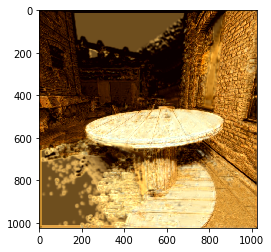

epoch [13001/20000], loss:0.0215
epoch [13011/20000], loss:0.0215
epoch [13021/20000], loss:0.0213
epoch [13031/20000], loss:0.0222
epoch [13041/20000], loss:0.0220
epoch [13051/20000], loss:0.0215
epoch [13061/20000], loss:0.0214
epoch [13071/20000], loss:0.0215
epoch [13081/20000], loss:0.0214
epoch [13091/20000], loss:0.0215
epoch [13101/20000], loss:0.0213
epoch [13111/20000], loss:0.0215
epoch [13121/20000], loss:0.0214
epoch [13131/20000], loss:0.0213
epoch [13141/20000], loss:0.0213
epoch [13151/20000], loss:0.0213
epoch [13161/20000], loss:0.0213
epoch [13171/20000], loss:0.0213
epoch [13181/20000], loss:0.0217
epoch [13191/20000], loss:0.0217
epoch [13201/20000], loss:0.0215
epoch [13211/20000], loss:0.0214
epoch [13221/20000], loss:0.0215
epoch [13231/20000], loss:0.0213
epoch [13241/20000], loss:0.0214
epoch [13251/20000], loss:0.0213
epoch [13261/20000], loss:0.0216
epoch [13271/20000], loss:0.0214
epoch [13281/20000], loss:0.0212
epoch [13291/20000], loss:0.0212
epoch [133

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


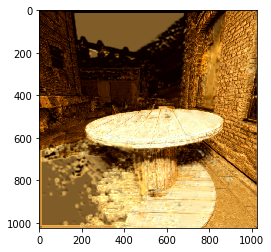

epoch [14001/20000], loss:0.0224
epoch [14011/20000], loss:0.0217
epoch [14021/20000], loss:0.0213
epoch [14031/20000], loss:0.0211
epoch [14041/20000], loss:0.0213
epoch [14051/20000], loss:0.0212
epoch [14061/20000], loss:0.0210
epoch [14071/20000], loss:0.0210
epoch [14081/20000], loss:0.0210
epoch [14091/20000], loss:0.0210
epoch [14101/20000], loss:0.0210
epoch [14111/20000], loss:0.0210
epoch [14121/20000], loss:0.0210
epoch [14131/20000], loss:0.0211
epoch [14141/20000], loss:0.0210
epoch [14151/20000], loss:0.0210
epoch [14161/20000], loss:0.0210
epoch [14171/20000], loss:0.0210
epoch [14181/20000], loss:0.0210
epoch [14191/20000], loss:0.0215
epoch [14201/20000], loss:0.0213
epoch [14211/20000], loss:0.0210
epoch [14221/20000], loss:0.0218
epoch [14231/20000], loss:0.0218
epoch [14241/20000], loss:0.0214
epoch [14251/20000], loss:0.0210
epoch [14261/20000], loss:0.0213
epoch [14271/20000], loss:0.0212
epoch [14281/20000], loss:0.0210
epoch [14291/20000], loss:0.0209
epoch [143

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


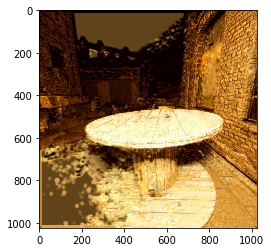

epoch [15001/20000], loss:0.0210
epoch [15011/20000], loss:0.0208
epoch [15021/20000], loss:0.0208
epoch [15031/20000], loss:0.0207
epoch [15041/20000], loss:0.0207
epoch [15051/20000], loss:0.0207
epoch [15061/20000], loss:0.0210
epoch [15071/20000], loss:0.0208
epoch [15081/20000], loss:0.0208
epoch [15091/20000], loss:0.0207
epoch [15101/20000], loss:0.0207
epoch [15111/20000], loss:0.0207
epoch [15121/20000], loss:0.0207
epoch [15131/20000], loss:0.0207
epoch [15141/20000], loss:0.0207
epoch [15151/20000], loss:0.0209
epoch [15161/20000], loss:0.0207
epoch [15171/20000], loss:0.0209
epoch [15181/20000], loss:0.0209
epoch [15191/20000], loss:0.0207
epoch [15201/20000], loss:0.0207
epoch [15211/20000], loss:0.0207
epoch [15221/20000], loss:0.0208
epoch [15231/20000], loss:0.0207
epoch [15241/20000], loss:0.0212
epoch [15251/20000], loss:0.0209
epoch [15261/20000], loss:0.0210
epoch [15271/20000], loss:0.0211
epoch [15281/20000], loss:0.0210
epoch [15291/20000], loss:0.0208
epoch [153

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


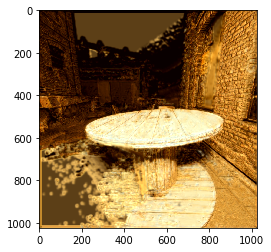

epoch [16001/20000], loss:0.0205
epoch [16011/20000], loss:0.0205
epoch [16021/20000], loss:0.0214
epoch [16031/20000], loss:0.0211
epoch [16041/20000], loss:0.0207
epoch [16051/20000], loss:0.0205
epoch [16061/20000], loss:0.0208
epoch [16071/20000], loss:0.0206
epoch [16081/20000], loss:0.0205
epoch [16091/20000], loss:0.0204
epoch [16101/20000], loss:0.0204
epoch [16111/20000], loss:0.0207
epoch [16121/20000], loss:0.0205
epoch [16131/20000], loss:0.0205
epoch [16141/20000], loss:0.0205
epoch [16151/20000], loss:0.0204
epoch [16161/20000], loss:0.0204
epoch [16171/20000], loss:0.0204
epoch [16181/20000], loss:0.0205
epoch [16191/20000], loss:0.0204
epoch [16201/20000], loss:0.0205
epoch [16211/20000], loss:0.0204
epoch [16221/20000], loss:0.0213
epoch [16231/20000], loss:0.0218
epoch [16241/20000], loss:0.0213
epoch [16251/20000], loss:0.0207
epoch [16261/20000], loss:0.0205
epoch [16271/20000], loss:0.0205
epoch [16281/20000], loss:0.0204
epoch [16291/20000], loss:0.0204
epoch [163

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


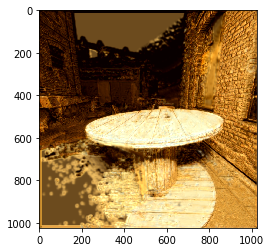

epoch [17001/20000], loss:0.0204
epoch [17011/20000], loss:0.0203
epoch [17021/20000], loss:0.0204
epoch [17031/20000], loss:0.0203
epoch [17041/20000], loss:0.0223
epoch [17051/20000], loss:0.0215
epoch [17061/20000], loss:0.0208
epoch [17071/20000], loss:0.0205
epoch [17081/20000], loss:0.0203
epoch [17091/20000], loss:0.0204
epoch [17101/20000], loss:0.0203
epoch [17111/20000], loss:0.0202
epoch [17121/20000], loss:0.0202
epoch [17131/20000], loss:0.0202
epoch [17141/20000], loss:0.0202
epoch [17151/20000], loss:0.0204
epoch [17161/20000], loss:0.0203
epoch [17171/20000], loss:0.0202
epoch [17181/20000], loss:0.0203
epoch [17191/20000], loss:0.0202
epoch [17201/20000], loss:0.0202
epoch [17211/20000], loss:0.0202
epoch [17221/20000], loss:0.0202
epoch [17231/20000], loss:0.0202
epoch [17241/20000], loss:0.0202
epoch [17251/20000], loss:0.0202
epoch [17261/20000], loss:0.0202
epoch [17271/20000], loss:0.0203
epoch [17281/20000], loss:0.0202
epoch [17291/20000], loss:0.0202
epoch [173

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


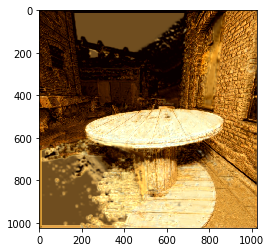

epoch [18001/20000], loss:0.0214
epoch [18011/20000], loss:0.0214
epoch [18021/20000], loss:0.0213
epoch [18031/20000], loss:0.0213
epoch [18041/20000], loss:0.0213
epoch [18051/20000], loss:0.0212
epoch [18061/20000], loss:0.0212
epoch [18071/20000], loss:0.0212
epoch [18081/20000], loss:0.0212
epoch [18091/20000], loss:0.0212
epoch [18101/20000], loss:0.0211
epoch [18111/20000], loss:0.0211
epoch [18121/20000], loss:0.0211
epoch [18131/20000], loss:0.0211
epoch [18141/20000], loss:0.0211
epoch [18151/20000], loss:0.0210
epoch [18161/20000], loss:0.0210
epoch [18171/20000], loss:0.0210
epoch [18181/20000], loss:0.0210
epoch [18191/20000], loss:0.0210
epoch [18201/20000], loss:0.0209
epoch [18211/20000], loss:0.0209
epoch [18221/20000], loss:0.0209
epoch [18231/20000], loss:0.0209
epoch [18241/20000], loss:0.0206
epoch [18251/20000], loss:0.0203
epoch [18261/20000], loss:0.0202
epoch [18271/20000], loss:0.0201
epoch [18281/20000], loss:0.0201
epoch [18291/20000], loss:0.0200
epoch [183

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


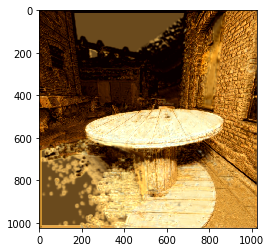

epoch [19001/20000], loss:0.0199
epoch [19011/20000], loss:0.0202
epoch [19021/20000], loss:0.0203
epoch [19031/20000], loss:0.0200
epoch [19041/20000], loss:0.0198
epoch [19051/20000], loss:0.0208
epoch [19061/20000], loss:0.0217
epoch [19071/20000], loss:0.0221
epoch [19081/20000], loss:0.0219
epoch [19091/20000], loss:0.0217
epoch [19101/20000], loss:0.0216
epoch [19111/20000], loss:0.0215
epoch [19121/20000], loss:0.0214
epoch [19131/20000], loss:0.0213
epoch [19141/20000], loss:0.0212
epoch [19151/20000], loss:0.0212
epoch [19161/20000], loss:0.0211
epoch [19171/20000], loss:0.0211
epoch [19181/20000], loss:0.0211
epoch [19191/20000], loss:0.0211
epoch [19201/20000], loss:0.0210
epoch [19211/20000], loss:0.0210
epoch [19221/20000], loss:0.0210
epoch [19231/20000], loss:0.0210
epoch [19241/20000], loss:0.0209
epoch [19251/20000], loss:0.0209
epoch [19261/20000], loss:0.0209
epoch [19271/20000], loss:0.0209
epoch [19281/20000], loss:0.0209
epoch [19291/20000], loss:0.0208
epoch [193

In [9]:
for epoch in range(num_epochs):
    for i,data in enumerate(trainloader):
        img, groundtruth = data
        img = img.unsqueeze(0)
        groundtruth = groundtruth.unsqueeze(0)
        # ===================forward=====================
        output = model(img)
        loss = distance(output, groundtruth)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        if epoch%1000 == 0:
            implotpred = plt.imshow(output.cpu().detach().permute(0,2,3,1).numpy().squeeze(), vmin=0, vmax=1)
            plt.show()
    # ===================log========================
    if epoch%10 == 0:
        print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.data))
print('Finished Training')

A part of the next cell should be in utils/save_model.py

In [13]:
PATH = './OneImageBiggerAutoEncoder_net.pth'
torch.save(model.state_dict(), PATH)

Input:


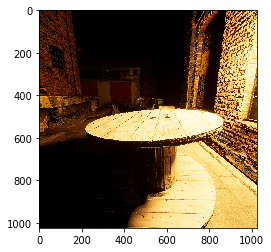

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted:


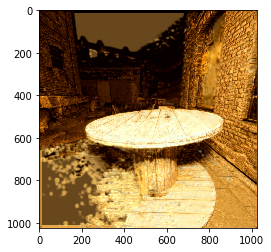

GroundTruth:


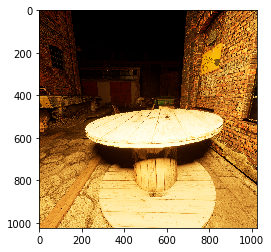

In [12]:
for i,data in enumerate(testloader):
        img, groundtruth = data
        img = img.unsqueeze(0)
        groundtruth = groundtruth.unsqueeze(0)
        # ===================forward=====================
        output = model(img)
        
        print ("Input:")
        implotin = plt.imshow(img.cpu().detach().permute(0,2,3,1).numpy().squeeze())
        plt.show()
        print ("Predicted:")
        implotpred = plt.imshow(output.cpu().detach().permute(0,2,3,1).numpy().squeeze(), vmin=0, vmax=1)
        plt.show()
        print ("GroundTruth:")
        implotgt = plt.imshow(groundtruth.cpu().detach().permute(0,2,3,1).numpy().squeeze())
        plt.show()